# ShowerPy Demo 
This notebook illustrates some of the functionality of the ShowerPy package 

# 1. Simulating showers

To simulate showers, we can use the `CorsikaRunner` class 

In [ ]:
from astropy import units as u
from CorsikaRunner import CorsikaRunner
import os

# This is the path to your compiled CORSIKA binary 
# Note: this is my public install and should work for you on woodycap5 and woodycap6
path_corsika_executable = '/home/wecapstor1/caph/mppi076h/public/corsika/corsika-78000/run/corsika78000Linux_QGSIII_urqmd'

# We now open the runner
CR = CorsikaRunner(
    path_corsika_executable = path_corsika_executable
)

# And configure a run, we want to simulate 
CR.configure_run(
    primary_particle = 'gamma', 
    primary_energy = 50 * u.GeV,
    observation_level= 0 * u.km,
    zenith_angle = 0. * u.deg,
    random_seeds = True,
    path_output = os.path.join(os.getcwd(),'50GeV_gamma_0deg_zenith')
)

# Let us have a look at the current config 
CR.current_config


{'run_number': 1,
 'primary_particle': 1,
 'primary_energy': <Quantity 50. GeV>,
 'observation_level': <Quantity 0. cm>,
 'zenith_angle': <Quantity 0. deg>,
 'seeds': 'SEED    260745617    497    0     seed for random number sequence 1\nSEED    788746656    355    0     seed for random number sequence 2\nSEED    491281173    566    0     seed for random number sequence 3\nSEED    12121579    115    0     seed for random number sequence 4',
 'path_output': '/Users/johannesschafer/software/showerpy/50eV_gamma_0deg_zenith'}

Now that we have the config, we can start the simulation using the `CR.run_simulation()` call. Depending on your selections this may take anywhere from 20 seconds to a few minutes. 

In [9]:
CR.run_simulation()

Starting CORSIKA simulation (this may take a few minutes)...


I/O block extended by 122880 to 1122880 bytes
I/O block extended by 139264 to 1262144 bytes
I/O block extended by 155648 to 1417792 bytes
I/O block extended by 172032 to 1589824 bytes
I/O block extended by 196608 to 1786432 bytes
I/O block extended by 221184 to 2007616 bytes
I/O block extended by 245760 to 2253376 bytes
I/O block extended by 278528 to 2531904 bytes
I/O block extended by 311296 to 2843200 bytes
I/O block extended by 352256 to 3195456 bytes
I/O block extended by 393216 to 3588672 bytes
I/O block extended by 442368 to 4031040 bytes
I/O block extended by 499712 to 4530752 bytes
I/O block extended by 565248 to 5096000 bytes
I/O block extended by 630784 to 5726784 bytes
I/O block extended by 712704 to 6439488 bytes
I/O block extended by 802816 to 7242304 bytes
I/O block extended by 901120 to 8143424 bytes
I/O block extended by 1015808 to 9159232 bytes
I/O block extended by 1138688 to 10297920 bytes
I/O block extended by 1286144 to 11584064 bytes
I/O block extended by 1441792

Simulation has completed
	-> Copying files to user directory
	-> Cleanup temporary working directory


# 2. Plotting showers

In order to plot showers, we will use the `CorsikaPlotter` Class. At first, we need to tell the plotter, where our files are located (this directory). Afterwards, `CorsikaPlotter` will parse all the data into pandas dataframes

In [ ]:
from CorsikaPlotter import CorsikaPlotter

path_data = CR.current_config['path_output']
CP = CorsikaPlotter(path_data)


Looking for available files:
	 -> em_data        : Found sim_DAT000001.track_em
	 -> muon_data      : Found sim_DAT000001.track_mu
	 -> hadron_data    : Found sim_DAT000001.track_hd
	 -> cherenkov_data : Found sim_cherenkov_iact

Parsing Cherenkov photon data

Parsing particle track data
	-> Reading sim_DAT000001.track_em


/Users/johannesschafer/software/miniforge3/envs/showerpy/lib/python3.13/site-packages/corsikaio/subblocks/run_header.py:84: UserWarning: Version unknown, using run header definition dtype of version 7.x
  warnings.warn("Version unknown, using run header definition dtype of version 7.x")
/Users/johannesschafer/software/miniforge3/envs/showerpy/lib/python3.13/site-packages/corsikaio/subblocks/event_header.py:144: UserWarning: Version unknown, using event header dtype definition of version 7.7XXX
  warnings.warn("Version unknown, using event header dtype definition of version 7.7XXX")


	-> Reading sim_DAT000001.track_mu
	-> Reading sim_DAT000001.track_hd


/Users/johannesschafer/software/showerpy/CorsikaPlotter.py:219: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  particle_tracks_df = pd.concat([particle_tracks_df, temp_df], ignore_index=True)


We can now look at the cherenkov and particle track data in pandas data frame format if that is required. 

In [11]:
# The Cherenkov photons are stored in the ground plane with x/y coordinates. 
CP.cherenkov_photons

,x_impact_cm,y_impact_cm,cos_incident_x,cos_incident_y,time_since_first_interaction_ns,emission_height_asl_cm,wavelength_nm
0,7426.863770,-3039.512451,0.002519,-0.001031,-3328.313232,3047397.250,1524.756470
1,-8467.640625,-2542.892578,-0.002874,-0.000863,-3328.235352,3045589.750,192.668533
2,7913.327148,1948.829346,0.002688,0.000662,-3328.301758,3043782.000,437.044800
3,6349.115234,-4994.752441,0.002158,-0.001697,-3328.308350,3041974.250,641.576843
4,-6589.757324,-5248.998535,-0.002241,-0.001785,-3328.276123,3040166.750,263.977966
...,...,...,...,...,...,...,...
4179082,-74704.929688,-53650.128906,-0.054280,-0.054030,-3202.438721,1166993.125,283.093079
4179083,-79641.210938,-55040.640625,-0.058875,-0.055311,-3190.582764,1166863.125,129.061447
4179084,-52381.679688,-59079.414062,-0.033441,-0.059140,-3224.858398,1166727.625,122.489014
4179085,-62344.148438,-75681.625000,-0.042697,-0.074564,-3175.166992,1166594.875,104.379723


In [12]:
# The particles are stored as tracks, providng x,y,z start and stop values for each tracking step. the type of particle is encoded in the particle ID. 
CP.particle_tracks

,particle_id,energy_gev,x_start,y_start,z_start,t_start,x_end,y_end,z_end,t_end
0,1.0,1000.000061,0.000000,0.000000,1.200000e+07,0.000000,0.000000,-0.000000,3.049198e+06,0.000299
1,3.0,139.631592,0.000000,-0.000000,3.049198e+06,0.000299,0.011764,0.138498,3.017648e+06,0.000300
2,3.0,139.629929,0.011764,0.138498,3.017648e+06,0.000300,-0.026936,0.479932,2.987429e+06,0.000301
3,3.0,139.628265,-0.026936,0.479932,2.987429e+06,0.000301,0.322787,1.050445,2.958432e+06,0.000302
4,3.0,139.626602,0.322787,1.050445,2.958432e+06,0.000302,0.319098,1.734379,2.930562e+06,0.000303
...,...,...,...,...,...,...,...,...,...,...
816102,7.0,0.247029,-5137.539062,-3853.761230,7.469118e+05,0.000375,-5137.566406,-3853.750244,7.469118e+05,0.000375
816103,7.0,0.214787,-4412.772461,-4775.565918,3.291673e+05,0.000389,-4412.772949,-4775.565918,3.291673e+05,0.000389
816104,7.0,0.170237,-7844.205566,6763.708496,9.431224e+05,0.000369,-7843.785156,6763.685059,9.431224e+05,0.000369
816105,8.0,0.544499,3.038397,487.757019,9.145378e+05,0.000370,-261.615662,-4070.848145,9.110236e+05,0.000370


In [13]:
# The meaning of the particle id can be accessed from the particle map (dictionary) stored in the CorsikaRunner
CP.particle_map

{'gamma': 1,
 'electron': 2,
 'positron': 3,
 'muon': 5,
 'antimuon': 6,
 'proton': 14,
 'helium': 402,
 'lithium': 703,
 'beryllium': 904,
 'boron': 1105,
 'carbon': 1206,
 'nitrogen': 1407,
 'oxygen': 1608,
 'fluorine': 1909,
 'neon': 2010,
 'sodium': 2311,
 'magnesium': 2412,
 'aluminium': 2713,
 'silicon': 2814,
 'phosphorus': 3115,
 'sulfur': 3216,
 'chlorine': 3517,
 'argon': 3618,
 'potassium': 3919,
 'calcium': 4020,
 'scandium': 4321,
 'titanium': 4422,
 'vanadium': 4723,
 'chromium': 4824,
 'manganese': 5125,
 'iron': 5626}

We can now finally create the famous shower plots. The following example uses some internal autoscaling. if you are not happy with the display, you can always work with the pandas dataframes :) 

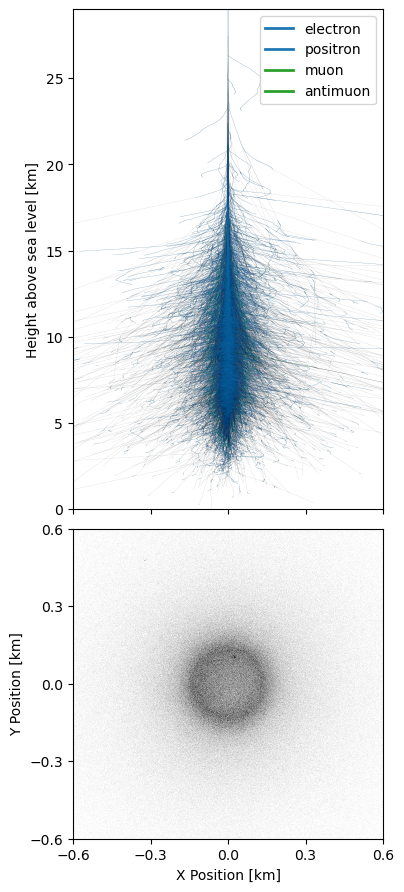

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Create shower profile plot
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(4, 12), sharex=True)

# Readjust the distance between the two subplots to be minimal
fig.subplots_adjust(hspace=-0.15)

# Plot the X-Z data on the first subplot (top)
plt.sca(ax0)

# We can also define a color dict to specify the plot color for different particles
color_dict = {
 "electron": "tab:blue",
 "positron": "tab:blue",
 "muon": "tab:green",
 "antimuon": "tab:green",
#  "gamma": "orange", 
}


# Now we plot the side profile
ax0 = CP.plot_side_profile(ax = ax0,
                           alpha=0.4, # Opacity of a single track
                           color_dict = color_dict,
)
plt.ylabel('Height above sea level [km]')

# Add the cherenkov photon distribution on ground
plt.sca(ax1)
ax1 = CP.plot_cher_distribution(ax = ax1,
                                # vmax = 120, # if this is commented, out we will use autoscaling for the color scale. otherwise you can provide your own max value depending on the contrast you want to get
                                nbins = 800 # Number of bins for cherenkov distribution plot
)


radial_distance = 0.6 # in km
x_tick = 0.3 # in km
ax1.set_xlim(-radial_distance, radial_distance)
ax1.set_ylim(-radial_distance, radial_distance)
plt.xticks(np.arange(-radial_distance, radial_distance+x_tick, x_tick))
plt.yticks(np.arange(-radial_distance, radial_distance+x_tick, x_tick))
plt.xlabel('X Position [km]')
plt.ylabel('Y Position [km]')

# Save the figure if you want to
# Note: Only save as PDF if you need to. There may be too many lines to display
# plt.savefig('FILENAME.jpg', dpi =300, bbox_inches='tight')

plt.show()

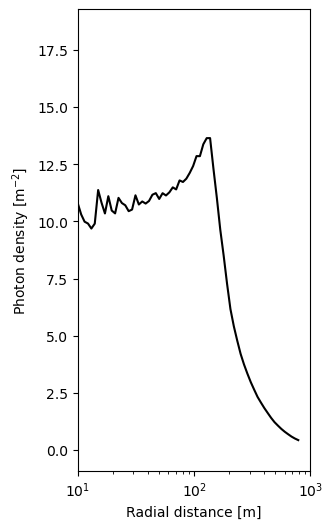

In [2]:
# We can also plot the cherenkov photon density on ground vs. radial distance 
import matplotlib.pyplot as plt

ax = CP.plot_ground_photon_density(
    ax = None, 
    nbins = 200
)

plt.show()